<a href="https://colab.research.google.com/github/parrisatwork/parrisatwork-Prediction-of-Product-Sale/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Product Sales**

- **Author:** Parris Trimingham

## **Project Overview**

## Data Dictionary

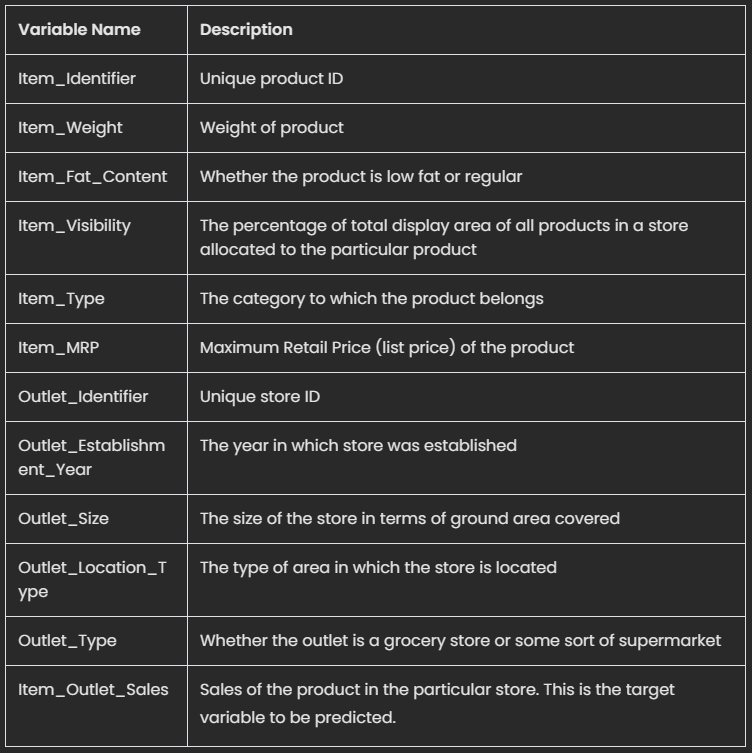

## **Imports**

In [2]:
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns
# MissingNo
import missingno as msno

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**


In [3]:
# Importing Data:
df = pd.read_csv('/content/drive/MyDrive/Data/sales_predictions.csv')

In [4]:
# Gathering parameters:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean Data**


In [6]:
# Gathering parameters:
df.shape

(8523, 12)

- #### There are 8523 rows, and 12 columns.

In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- #### All other data types are as they should be.

## Duplicated Data

In [8]:
# Let's search for duplicated data:
df.duplicated().sum()

0

There are no duplicated data to drop.

## Missing Data

In [9]:
# Let's search for missing data:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- #### Identifying of missing data yields Weight (1463) and Size (2410) have missing data. Let's identifiy the percentage that is missing.

In [10]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- #### Both Weight (17%) and Size (28%) have missing data and it would be best to drop these rows.

- **Missing 17.17% and 28.28% of values**
- **Strategy:**
 - Replace missing values with the median value of the column
- **Justification**
  - This is less affected by outliers than strategy = 'mean'.
  - However, for the Outlet_size, we can use the most frequented value.

In [11]:
# Define the Item_Weight Mean.
median_Weight = df['Item_Weight'].median()

In [12]:
## Replace the missing values with the column's 'median' value.
df['Item_Weight'].fillna(value = median_Weight, inplace = True)

In [13]:
# Let's check out the Item_Weight column for missing data.
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
## And we will fill in the missing Outlet_Size data with "Unknown"
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [15]:
# Now let's look for missing data.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- #### We can confirm that now, there is no missing data.

## Fixing Data Types

## Inspecting Categorical Columns & Addressing Inconsistent Values

- #### We will now address the data types and make sure that they match the data dictionary.

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
# Let's see what issues lie in the Item_Fat_Content label.
pd.set_option('display.max_rows', None)
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- #### Upon further investigating, "Item_Fat_Content" has inconsistant categories of data. Let's clean that up.

In [18]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')

- #### And let's confirm it was changed.

In [19]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [21]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
FDV60     9
NCQ06     9
FDF52     9
FDX04     9
NCJ30     9
FDV38     9
NCF42     9
FDT07     9
FDW26     9
NCL31     9
FDU12     9
FDG09     9
FDQ40     9
FDX20     9
NCI54     9
FDX31     9
FDP25     9
FDW49     9
FDF56     9
FDO19     9
DRN47     9
NCB18     9
FDE11     8
NCX05     8
FDQ39     8
FDT55     8
FDO32     8
FDT40     8
FDZ20     8
FDH27     8
FDY49     8
FDS33     8
FDR04     8
FDR43     8
FDR59     8
FDJ55     8
FDT24     8
FDY55     8
FDV09     8
FDU23     8
FDY47     8
DRD25     8
FDK58     8
FDL58     8
FDX58     8
FDR44     8
FDP28     8
FDA39     8
FDH28     8
DRF27     8
FDX21     8
FDY56     8
FDF05     8
FDL20     8
FDY03     8
NCK05     8
FDS55     8
DRA59     8
FDG24     8
NCE54     8
FDZ21     8
FDA04     8
FDW24     8
FDT49     8
DRF23     8
FDD05     8
FDH10     8
FDX50     8
FDT32     8
FDK20     8
FDU13     8
FDN56     8
FDZ26     8
FDL34     8
DRF01     8
FDG38     8
NCE31    

- #### After further investigation of the categorical columns, there are zero inconsistencies with spelling or grammar of any categories.

## Summary Statistics for Numeric Features

In [22]:
# And here are the stats of the data we do have:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## **Exploratory Data Analysis**


### Exploratory Visuals & Analysis

- #### To help illustrate the Production Sale data, we will produce visual aides in the form of charts.

 - Histogram to view the distributions of various features in your dataset.
 - Boxplot to view statistical summaries of various features in your dataset.
 - Heatmap of the correlation between features.

In [23]:
# Checking info again before we proceed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 - For each numeric feature, we will plot the distribution and a boxplot.

In [24]:
# Let's find out what those numeric featurs are:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

In [26]:
# Just gathering more data:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


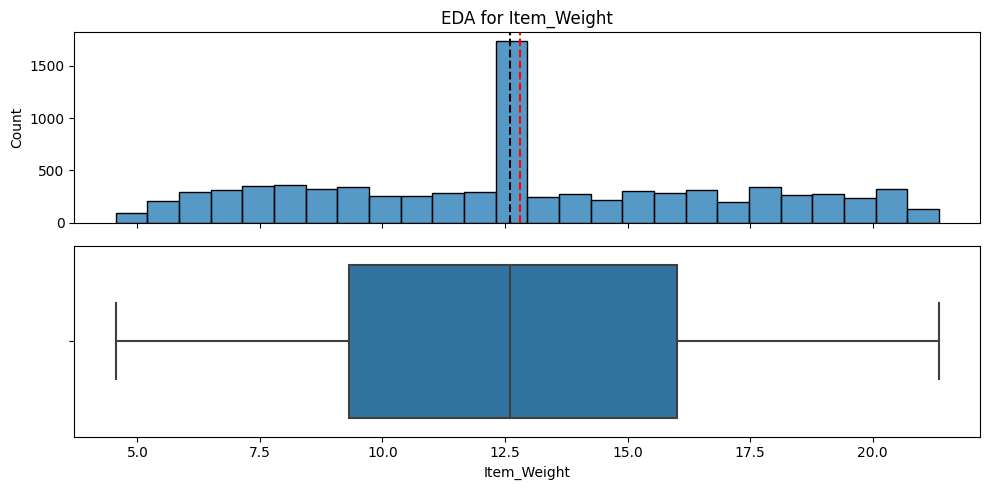

In [27]:
plot_numeric(df,'Item_Weight')

 - Look at that! Going over "Item Weight", we can see that both the Mean (12.81342) and the Median (12.60000) weights are about equal.

## **Exploratory Data Analysis**


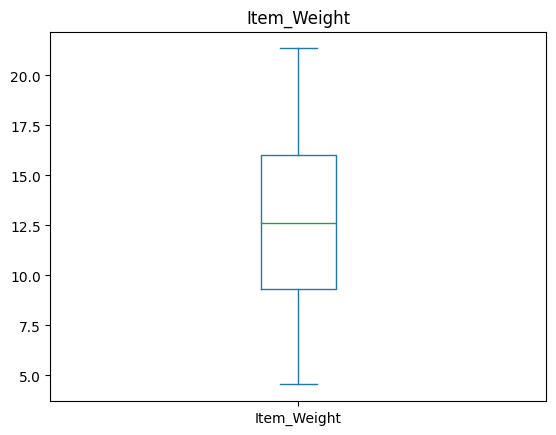

In [32]:
## Using kind='box'
ax = df['Item_Weight'].plot(kind='box')

## Set the Title
ax.set_title('Item_Weight');

<ipython-input-35-00491ccd23a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

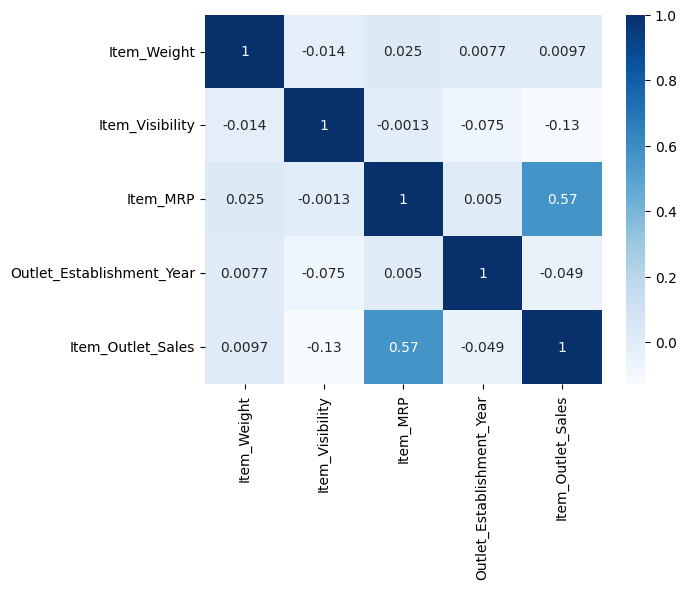

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')